# ***Regresión lineal***
## Aprendizaje automático de máquina

## **Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import StandardScaler #preprosesamiento de datos
from sklearn.model_selection import train_test_split #entramar los datos
from sklearn.linear_model import LinearRegression #hacer la regresion
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, accuracy_score, classification_report, r2_score #usar las metricas de errores, para verificar que los datos estan bien
from sklearn.manifold import TSNE

## **Importar el dataset**

In [2]:
data_ori=pd.read_csv('databases\processes2.csv')
data=data_ori.copy()

## **Preprocesamiento de los datos**




In [3]:
data.info() #Información de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2095 non-null   int64  
 1   name                2095 non-null   object 
 2   year                2095 non-null   int64  
 3   selling_price       2095 non-null   int64  
 4   km_driven           2095 non-null   int64  
 5   fuel                2095 non-null   object 
 6   seller_type         2095 non-null   object 
 7   transmission        2095 non-null   object 
 8   owner               2095 non-null   object 
 9   seats               2095 non-null   int64  
 10  max_power (in bph)  2095 non-null   float64
 11  Mileage Unit        2095 non-null   object 
 12  Mileage             2095 non-null   float64
 13  Engine (CC)         2095 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 229.3+ KB


In [4]:
data.nunique()

Unnamed: 0            2095
name                    10
year                    20
selling_price          308
km_driven              372
fuel                     4
seller_type              3
transmission             2
owner                    5
seats                    4
max_power (in bph)      77
Mileage Unit             2
Mileage                 86
Engine (CC)             27
dtype: int64

In [5]:
print(data.isnull().sum(), '\n') #Revisar la cantidad de datos nulos

Unnamed: 0            0
name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
seats                 0
max_power (in bph)    0
Mileage Unit          0
Mileage               0
Engine (CC)           0
dtype: int64 



In [6]:
data.drop(columns=['Unnamed: 0']).corr()

,year,selling_price,km_driven,seats,max_power (in bph),Mileage,Engine (CC)
year,1.000000,0.669213,-0.469055,0.009686,0.293524,0.251596,0.185846
selling_price,0.669213,1.000000,-0.239156,0.137711,0.677668,0.179155,0.568887
km_driven,-0.469055,-0.239156,1.000000,0.066014,0.090387,0.062393,0.250732
seats,0.009686,0.137711,0.066014,1.000000,0.054139,-0.105186,0.034715
max_power (in bph),0.293524,0.677668,0.090387,0.054139,1.000000,0.135230,0.850453
Mileage,0.251596,0.179155,0.062393,-0.105186,0.135230,1.000000,0.215813
Engine (CC),0.185846,0.568887,0.250732,0.034715,0.850453,0.215813,1.000000


### **Graficas**

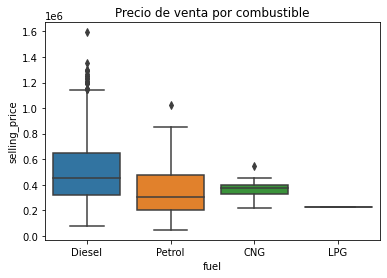

In [7]:
data_fuel = data.groupby('fuel')[['selling_price', 'km_driven', 'max_power (in bph)']].mean().reset_index()

sns.boxplot(x='fuel', y='selling_price', data=data)
plt.title('Precio de venta por combustible')
plt.show()

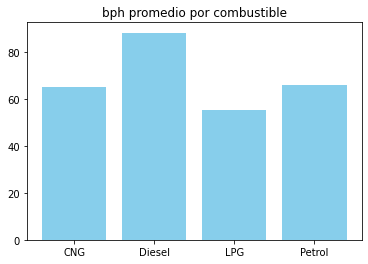

In [8]:
plt.bar(x=data_fuel['fuel'], height=data_fuel['max_power (in bph)'], color='skyblue')
plt.title('bph promedio por combustible')
plt.show()

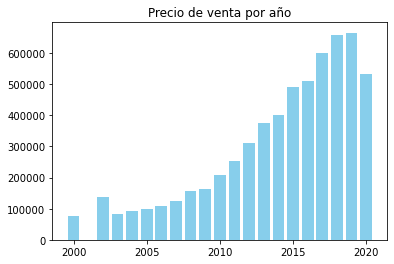

In [9]:
data_year = data.groupby('year')[['selling_price', 'km_driven']].mean().reset_index()

plt.bar(x=data_year['year'], height=data_year['selling_price'], color='skyblue')
plt.title('Precio de venta por año')
plt.show()

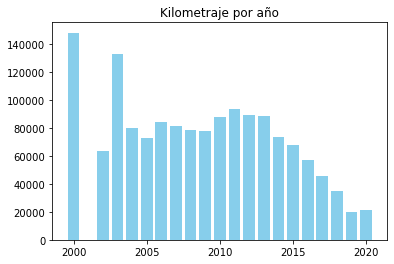

In [10]:
plt.bar(data_year['year'], data_year['km_driven'], color='skyblue')
plt.title('Kilometraje por año')
plt.show()

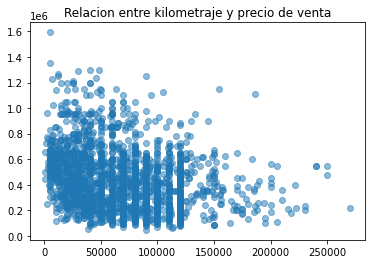

In [11]:
plt.scatter(data['km_driven'], data['selling_price'], alpha=0.5)
plt.title('Relacion entre kilometraje y precio de venta')
plt.show()

## **Aplicación del algoritmo regresión**

### **Separación de los datos para la clasificación**

In [12]:
#tomar los datos importantes
data_vf = data[['year', 'selling_price', 'km_driven', 'max_power (in bph)', 'Engine (CC)']]

#separar los x y el y (donde y es la variable objetivo)
#si se usa data en vez de data_vf se estan incluyendo la dummyficacion de los no numericos
y = data_vf['selling_price']
X = data_vf.drop('selling_price', axis=1)

In [13]:
#separar la info de data en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=911)
print(X_train.shape)
print(X_test.shape)

(1466, 4)
(629, 4)


In [14]:
#Estandarizar los datos
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### **Creación del modelo**

In [15]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)
y_pred = lr.predict(X_test_sc)

### **Reporte y métricas**

* Error cuadrático medio MSE: Calcula el promedio de los cuadrados de las diferencias entre los valores predichos y los valores reales.
$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
* Error absoluto medio (MAE): Calcula el promedio de las diferencias absolutas entre los valores predichos y los valores reales.
$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$
* Coeficiente de determinación ($R^{2}$): Indica la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un valor de $R^2$ cercano a 1 indica un buen ajuste del modelo a los datos.
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

In [16]:
metrica1 = mean_absolute_error(y_pred=y_pred, y_true=y_test)
metrica2 = mean_squared_error(y_pred=y_pred, y_true=y_test)

print('MSE =', metrica1)
print('MAE =', metrica2)

MSE = 93321.19869729763
MAE = 15182024175.249985


In [17]:
r2 = r2_score(y_test, y_pred)
print('r^2 =', r2)

r^2 = 0.7109834188640634


In [18]:
for name, beta in zip(X.columns, lr.coef_):
    print(f"{name}: {beta:.4f} -> {beta/y_train.mean():.4f}")

year: 111064.6097 -> 0.2597
km_driven: -19044.8255 -> -0.0445
max_power (in bph): 99858.1659 -> 0.2335
Engine (CC): 35389.6249 -> 0.0828


### **Gráficas**

#### **Diagrama de dispersión (por reducción de la dimensionalidad por t-SNE)**

Gráfica entre una variable (kilometraje en este caso) y los valores predichos y los reales.

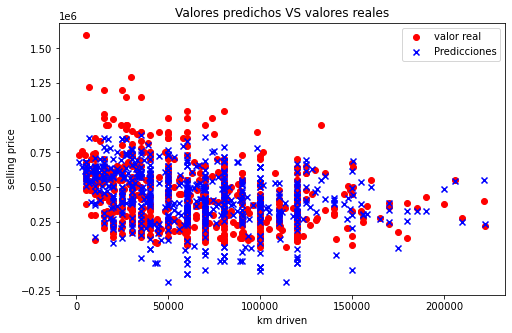

In [19]:
#grafica del kilometraje y el precio
plt.figure(figsize=(8, 5))
plt.scatter(X_test['km_driven'], y_test, marker='o', color='r') #ponga una o en los valores reales
plt.scatter(X_test['km_driven'], y_pred, marker='x', color='b') #ponga una x en las prediciones
plt.title('Valores predichos VS valores reales')
plt.xlabel('km driven')
plt.ylabel('selling price')
plt.legend(['valor real', 'Predicciones'])
plt.show()

Gráfica de todos las variables (del test) por reducción de la dimensionalidad y los valores predichos y los reales.

In [20]:
per = 30
tsne = TSNE(n_components=1, random_state=911, perplexity=per)
X_t = X_test.values
X_tsne = tsne.fit_transform(X_t)

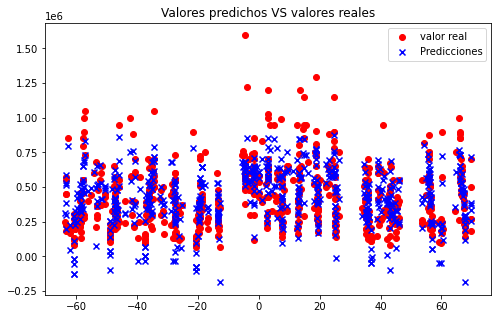

In [21]:
plt.figure(figsize=(8, 5))
plt.scatter(X_tsne, y_test, marker='o', color='r') #ponga una o en los valores reales
plt.scatter(X_tsne, y_pred, marker='x', color='b') #ponga una x en las prediciones
plt.title('Valores predichos VS valores reales')
plt.legend(['valor real', 'Predicciones'])
plt.show()

Gráfica de todos las variables incluyendo el train, test y la predicción, por reducción de la dimensionalidad.

In [22]:
# unir los datos de entrenamiento, prueba y predicción
X_all = np.concatenate((X_train, X_test, X_test), axis=0)
y_all = np.concatenate((np.ones(len(X_train)), np.ones(len(X_test))*2, np.ones(len(X_test))*3), axis=0) # Etiquetas para distinguir los conjuntos

# Reducción de dimensionalidad
pe=30
tsne = TSNE(n_components=1, random_state=911, perplexity=pe)
X_tsne = tsne.fit_transform(X_all)

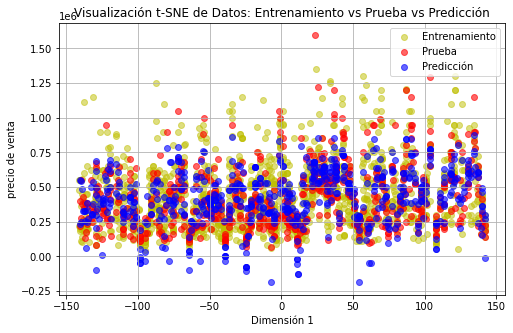

In [23]:
# Graficar los puntos
alpha=0.6
plt.figure(figsize=(8, 5))
plt.scatter(X_tsne[y_all == 1, 0], y_train, label='Entrenamiento', color='y', alpha=0.5)
plt.scatter(X_tsne[y_all == 2, 0], y_test, label='Prueba', color='r', alpha=alpha)
plt.scatter(X_tsne[y_all == 3, 0], y_pred, label='Predicción', color='b', alpha=alpha)
plt.xlabel('Dimensión 1')
plt.ylabel('precio de venta')
plt.title('Visualización t-SNE de Datos: Entrenamiento vs Prueba vs Predicción')
plt.legend()
plt.grid(True)
plt.show()

#### **Distribución de residuos**

* Forma de la distribución: los residuos deberían seguir una distribución normal alrededor de cero, es decir los residuos están cerca de cero y la distribución es simétrica. Si está centrada en cero, significa que el modelo de regresión no tiene un sesgo hacia derecha o hacia izquierda.

* Simetría de la distribución: La simétrica indica que el modelo no tiene problemas de sesgo en sus predicciones y que los errores positivos y negativos están distribuidos de manera uniforme.

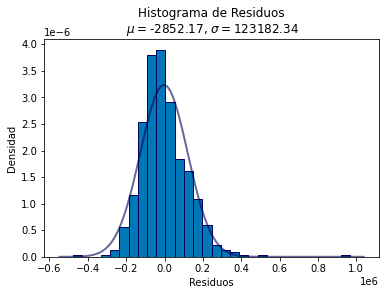

In [24]:
from scipy.stats import norm
#Calcula los residuos
residuos = y_test - y_pred

mu, sigma = norm.fit(residuos)

# Grafica el histograma de los residuos
plt.hist(residuos, bins=30, edgecolor='#03045e', color='#0077b6', density=True)

# Calcula la densidad de la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)

# Grafica la curva de la distribución normal
plt.plot(x, p, '#03045e', linewidth=2, alpha=0.6)

plt.xlabel('Residuos')
plt.ylabel('Densidad')
plt.title(f'Histograma de Residuos\n $\mu=${round(mu, 2)}, $\sigma=${round(sigma, 2)}')
plt.show()